To dive deep into confusion matrix and ROC curve we will be using the example of MNIST dataset (The MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.)

For simplicity we only consider the 5 digit classifier which divides dataset into to 5's and not 5's (binary classification).

In this case the 5's are only the 10% percent of the dataset. So by predicting every input as not 5 class you have 90% accuracy.

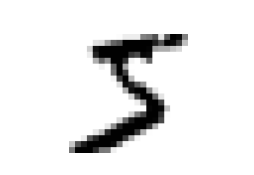

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others)

## Confusion matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are
classified as class B. For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion
matrix.

Suppose we have trained a model for this classification and we want to get the confusion matrix for it.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets.

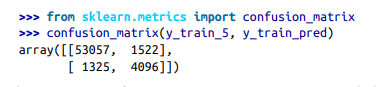

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.<br /> The first row of this matrix considers non-5 images (the negative class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).<br />
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classified as 5s (true positives). 

The confusion matrix gives you a lot of information, but sometimes you may prefer a
more concise metric. An interesting one to look at is the accuracy of the positive predictions

$$  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}  $$


TP is the number of true positives, and FP is the number of false positives.

A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%).<br /> This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named <i>recall</i>,  also called sensitivity or true positive rate.<br />
(TPR): this is the ratio of positive instances that are correctly detected by the classifier.

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}  $$

in simple terms: <br />
<b>Precision</b> : Measure of how many of the predicted positive instances were actually positive.<br />
<b>Recall</b> : Measure of how many of the actual positive instances were correctly predicted by the model.

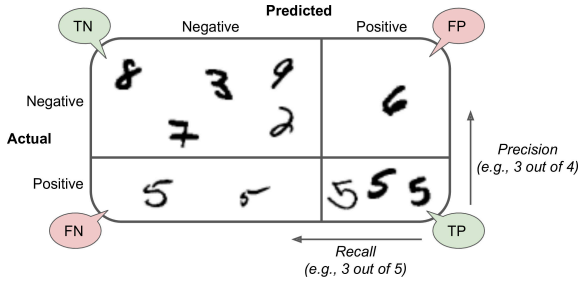

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1
 score is 
the harmonic mean of precision and recall.<br />
Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1
 score if both recall and precision are
high

$$ F1 = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{\text{TP}}{\text{TP} + \frac{\text{FN + FP}}{2}} $$

The F1
score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐
texts you really care about recall. <br />

For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your
product (in such cases, you may even want to add a human pipeline to check the clas‐
sifier’s video selection). On the other hand, suppose you train a classifier to detect
shoplifters on surveillance images: it is probably fine if your classifier has only 30%
precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught)

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeo.

For each instance, it computes a score based on a decision function, 
and if that score is greater than a threshold, it assigns the instance to the positive
class, or else it assigns it to the negative class.<br /> shows a few digits positioned
from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4
true positives (actual 5s) on the right of that threshold, and one false positive (actually
a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6
actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you
raise the threshold (move it to the arrow on the right), the false positive (the 6)
becomes a true negative, thereby increasing precision (up to 100% in this case), but
one true positive becomes a false negative, decreasing recall down to 50%. Conversely,
lowering the threshold increases recall and reduces precision.


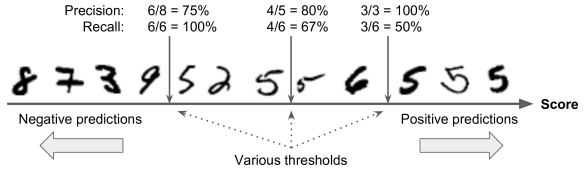

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

Finally, you can plot precision and recall as functions of the threshold value using
Matplotlib :

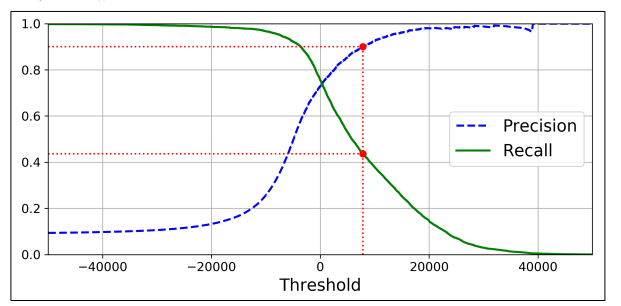

####  If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

## The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate.<br /> The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate, 
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity.<br /> Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

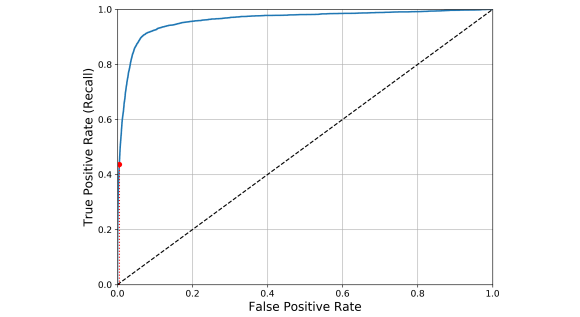

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces.<br /> The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC

reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb